In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df.head(10)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.864407,1,0.986863,0.976347,0.962870,0.947437,0.932340,0.909353,...,0.943013,0.950190,0.951930,0.958133,0.959353,0.960930,0.962103,0.970087,0.978917,1.0
1,"""third""",nn,0.859333,1,0.989000,0.978000,0.965000,0.949667,0.937333,0.913667,...,0.944000,0.952000,0.954667,0.961333,0.964667,0.968000,0.971667,0.976667,0.978333,1.0
2,"""best""",nn,0.860667,1,0.990333,0.977000,0.961333,0.948000,0.931667,0.912333,...,0.935667,0.945000,0.948000,0.950667,0.952333,0.953333,0.959000,0.967333,0.899667,1.0
3,"""second""",nn,0.858333,1,0.989333,0.975667,0.963333,0.949667,0.936000,0.914667,...,0.940000,0.948000,0.951000,0.953667,0.955333,0.959333,0.964000,0.971000,0.876333,1.0
0,"""real_third""",xgboost,0.847647,1,0.993763,0.982280,0.974740,0.962610,0.957367,0.943900,...,0.918377,0.926293,0.929303,0.930493,0.931930,0.934250,0.937730,0.945287,0.957443,1.0
1,"""third""",xgboost,0.853667,1,0.998000,0.995667,0.991000,0.979333,0.972333,0.951667,...,0.907000,0.916667,0.920000,0.923000,0.926000,0.929667,0.935333,0.939000,0.953333,1.0
2,"""best""",xgboost,0.856000,1,0.996000,0.991333,0.980000,0.977000,0.964000,0.955000,...,0.912000,0.920000,0.924000,0.927667,0.928667,0.932333,0.936000,0.941333,0.953667,1.0
3,"""second""",xgboost,0.853000,1,0.996667,0.990667,0.983000,0.976000,0.967667,0.956667,...,0.911000,0.919000,0.920333,0.924000,0.925667,0.927000,0.928667,0.935333,0.954000,1.0
0,"""real_third""",linear,0.860790,1,0.980623,0.966160,0.946120,0.922817,0.893903,0.862053,...,0.961547,0.969367,0.971427,0.978710,0.979537,0.982097,0.992367,0.400000,0.000000,1.0
1,"""third""",linear,0.861667,1,0.984333,0.968333,0.950333,0.929667,0.905000,0.872000,...,0.958000,0.969333,0.974000,0.975667,0.979333,0.982667,0.994000,0.066667,0.000000,1.0


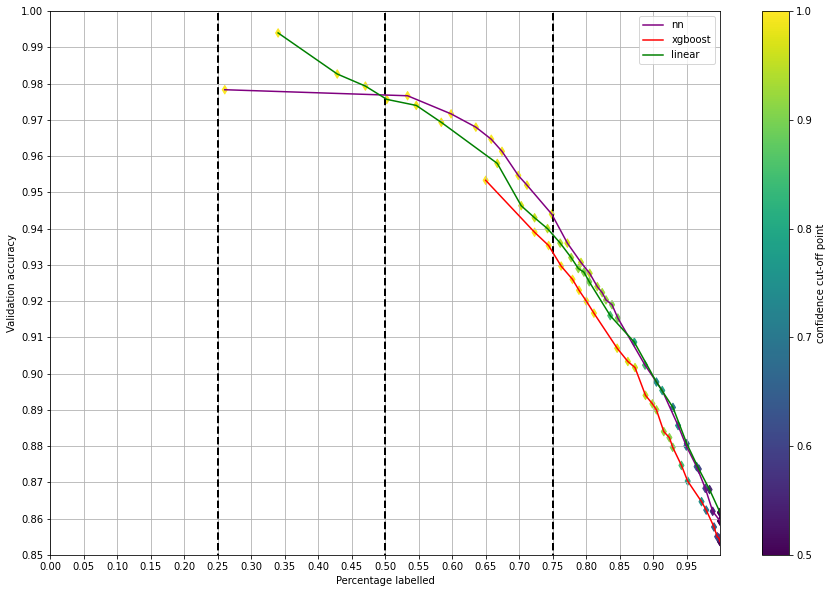

In [15]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
#df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.5):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (15,10))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences,vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point')

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.85, 1.0))
plt.grid()
plt.yticks(np.arange(0.85, 1, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('nur_8_conf.png')

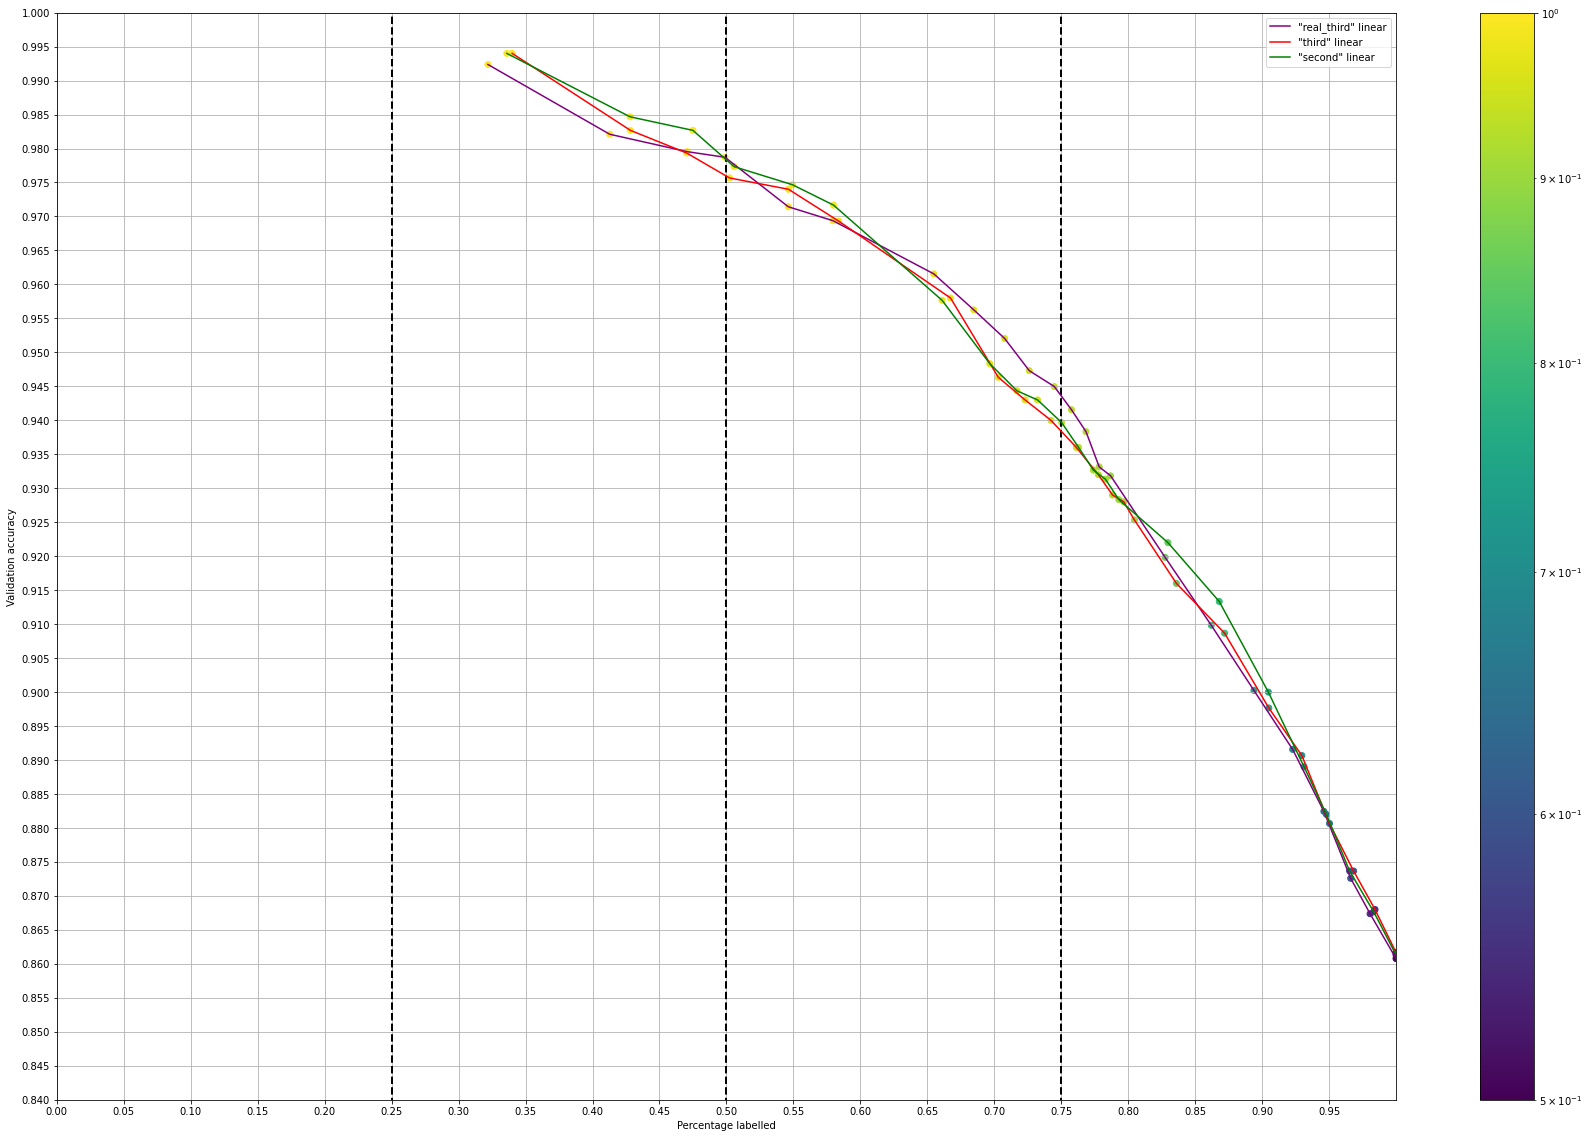

In [58]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

df = df[df['Name'] != '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1, step=0.005))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

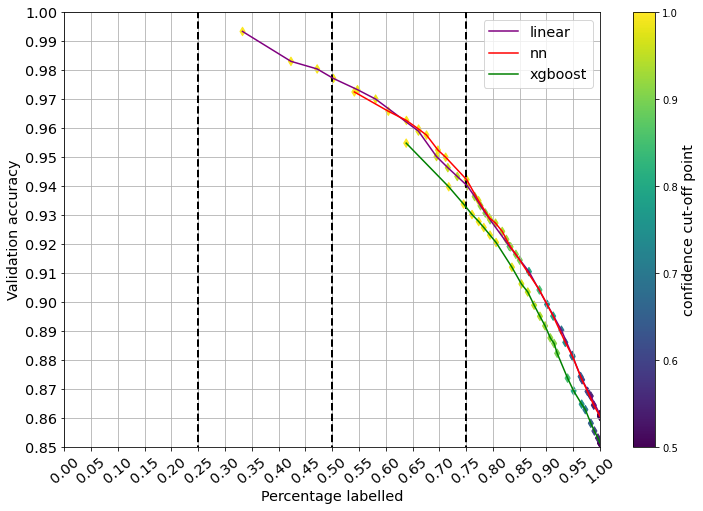

In [60]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"best"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
#df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences,vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.85, 1.0))
plt.grid()
plt.yticks(np.arange(0.85, 1, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Percentage labelled",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('nur_8_conf.png')

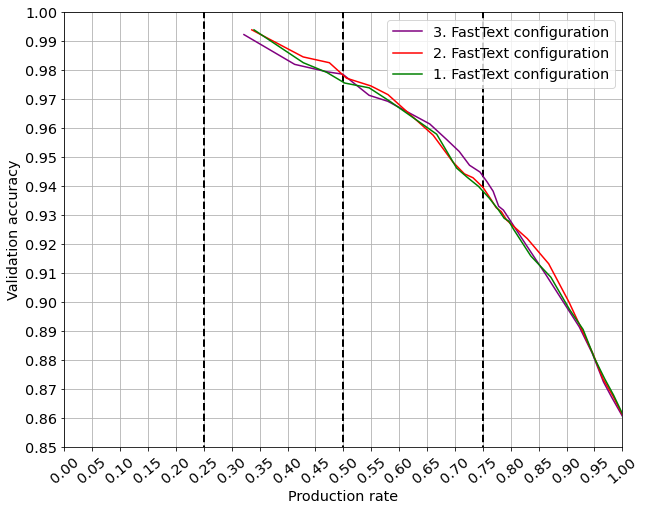

In [149]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"best"']

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
df = df[df.combi_model=="linear"] # best bestes
df= df.reindex([0,2,1])


#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (10,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    #plt.scatter(x=perc, y=acc, c=confidences,vmin=0.5, vmax=1.0, marker = "d")
    plt.plot(perc, acc, c=linecolor,  label = f"{name}")
#cbar = plt.colorbar()
#cbar.set_label('confidence cut-off point',fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.85, 1.0))
plt.grid()
plt.yticks(np.arange(0.85, 1, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('nur_8_linear.png')


In [70]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"best"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
#df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

#a= pd.DataFrame(confidences)
d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, combi_model):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,xgboost percentages,xgboost accuracies,nn percentages,nn accuracies,linear percentages,linear accuracies
0.000,1.000000,0.851438,1.000000,0.860691,1.000000,0.861263
0.500,1.000000,0.851438,1.000000,0.860691,1.000000,0.861263
0.550,0.996143,0.853208,0.988399,0.864536,0.982763,0.867682
0.600,0.989538,0.855637,0.976671,0.869292,0.966609,0.873309
0.650,0.982913,0.858300,0.963734,0.874417,0.948151,0.881703
0.700,0.972648,0.863008,0.948923,0.881299,0.927939,0.890410
0.750,0.965789,0.864893,0.935224,0.886194,0.901190,0.899304
0.800,0.950744,0.869476,0.912562,0.895258,0.867351,0.910610
0.850,0.939479,0.873866,0.886910,0.904290,0.831084,0.919278
0.900,0.920050,0.882434,0.850179,0.914569,0.794853,0.928498


In [139]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"best"']

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
names = ["3. FastText configuration", "1. FastText configuration", "2. FastText configuration"]
#combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]

#a= pd.DataFrame(confidences)
d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, names):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    

d= d[['1. FastText configuration percentages',       '1. FastText configuration accuracies', '2. FastText configuration percentages',
       '2. FastText configuration accuracies', '3. FastText configuration percentages',
       '3. FastText configuration accuracies']]
d.head(50)


,1. FastText configuration percentages,1. FastText configuration accuracies,2. FastText configuration percentages,2. FastText configuration accuracies,3. FastText configuration percentages,3. FastText configuration accuracies
0.000,1.000000,0.861667,1.000000,0.861333,1.000000,0.860790
0.500,1.000000,0.861667,1.000000,0.861333,1.000000,0.860790
0.550,0.984333,0.868000,0.983333,0.867667,0.980623,0.867380
0.600,0.968333,0.873667,0.965333,0.873667,0.966160,0.872593
0.650,0.950333,0.880667,0.948000,0.882000,0.946120,0.882443
0.700,0.929667,0.890667,0.931333,0.889000,0.922817,0.891563
0.750,0.905000,0.897667,0.904667,0.900000,0.893903,0.900247
0.800,0.872000,0.908667,0.868000,0.913333,0.862053,0.909830
0.850,0.836000,0.916000,0.829667,0.922000,0.827587,0.919833
0.900,0.804667,0.925333,0.793000,0.928333,0.786893,0.931827


In [125]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"best"']


#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
#combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()



for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<(max-0.01):
            accuracies[row][value] = 0.0
        else:
            max = accuracies[row][value]

#print(accuracies)
#print(percentages)
for min in [0, 0.25,0.5,0.75,0.9]:
    result = []
    for i in range(len(accuracies)):
        perce = np.flip(percentages[i])
        #print(perce)
        accu = np.flip(accuracies[i])
        #print(accu)        
        z = np.interp(np.arange(min,1,step=0.01), perce, accu, left= 0.0).mean()
        #print(z)
        result.append(z)
    print(min)
    print(result)
    print(names)

0
[0.7903441001193658, 0.7818296978791903, 0.7798955532511015]
['"real_third"' '"third"' '"second"']
0.25
[0.9394117812097674, 0.9337730939376606, 0.9355277877213833]
['"real_third"' '"third"' '"second"']
0.5
[0.9348984552187184, 0.9339562818217356, 0.9349399608249566]
['"real_third"' '"third"' '"second"']
0.75
[0.906089816072073, 0.9058511457387697, 0.9072037388450406]
['"real_third"' '"third"' '"second"']
0.9
[0.8818990135421322, 0.8831218729367665, 0.8831373422688422]
['"real_third"' '"third"' '"second"']
